Importing Libraries


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')   

Data Collection

In [ ]:
Loan_Data = pd.read_csv("../data/Loan.csv")
Loan_Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preparation

In [139]:
Loan_Data.shape

(614, 13)

In [140]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [141]:
Loan_Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [142]:
Loan_Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [143]:
Loan_Data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [144]:
Loan_Data.dropna(subset=['Married'], inplace=True)
Loan_Data.dropna(subset=['Self_Employed'], inplace=True)
Loan_Data["Gender"].fillna('Male',inplace=True)
Loan_Data["Dependents"].fillna('0',inplace=True)
Loan_Data["LoanAmount"].fillna("0",inplace=True)
Loan_Data["Loan_Amount_Term"].fillna(Loan_Data['Loan_Amount_Term'].mean(),inplace=True)
Loan_Data["Credit_History"].fillna(0.0,inplace=True)

In [145]:
Loan_Data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [146]:
encode_loandata=pd.get_dummies(Loan_Data)

<Axes: >

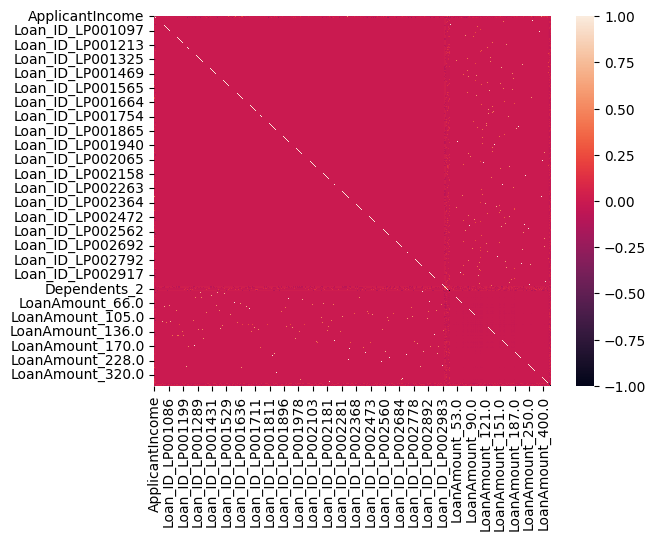

In [147]:
corr=encode_loandata.corr()
sns.heatmap(data=corr)

In [148]:
Loan_Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [149]:
Loan_Data['Dependents'].value_counts()

Dependents
0     338
1      96
2      96
3+     49
Name: count, dtype: int64

In [150]:
Loan_Data.replace({'Gender':{'Male':0,'Female':1},
                   'Married':{'No':0,'Yes':1},
                   'Dependents':{'0':0,'1':1,'2':2,'3+':4},
                   'Self_Employed':{'No':0,'Yes':1},
                   'Education':{'Not Graduate':0,'Graduate':1},
                   'Property_Area':{'Urban':0,'Rural':1,'Semiurban':2},
                   'Loan_Status':{'N':0,'Y':1}
                   },inplace=True)

In [151]:
Loan_Data['LoanAmount']=Loan_Data['LoanAmount'].astype('float64')

In [152]:
Loan_Data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.177893,0.656304,0.835924,0.778929,0.141623,5373.886010,1576.599171,140.920553,342.190813,0.772021,1.055268,0.683938
std,0.382753,0.475352,1.219374,0.415327,0.348965,5775.117538,2491.340803,87.795318,64.392871,0.419892,0.840406,0.465340
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2875.500000,0.000000,97.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3833.000000,1167.000000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.500000,1.000000,0.000000,5818.500000,2279.000000,166.500000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [153]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            579 non-null    object 
 1   Gender             579 non-null    int64  
 2   Married            579 non-null    int64  
 3   Dependents         579 non-null    int64  
 4   Education          579 non-null    int64  
 5   Self_Employed      579 non-null    int64  
 6   ApplicantIncome    579 non-null    int64  
 7   CoapplicantIncome  579 non-null    float64
 8   LoanAmount         579 non-null    float64
 9   Loan_Amount_Term   579 non-null    float64
 10  Credit_History     579 non-null    float64
 11  Property_Area      579 non-null    int64  
 12  Loan_Status        579 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 63.3+ KB


Train Test Split

In [154]:
X=Loan_Data.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y=Loan_Data['Loan_Status']

In [155]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)

In [156]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(521, 11)
(521,)
(58, 11)
(58,)


Model Building

In [157]:
Model=SVC()

In [158]:
Model.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [159]:
y_train_pred=Model.predict(x_train)
acc_scr=accuracy_score(y_train_pred,y_train)
print(acc_scr)

0.6871401151631478


In [161]:
ypred=Model.predict(x_test)
acc_scr=accuracy_score(ypred,y_test)
print(acc_scr)

0.6896551724137931


Prediction Mechanism

In [160]:
input_data=np.array([1,1,4,1,0,3036,2504,158,360,0,1]).reshape(1,-1)
prediction=Model.predict(input_data)
print(prediction)
if (prediction[0]==0):
  print('not approved')
else:
  print('approved')



[1]
approved


Experimental

In [163]:
Logistic_Regression = LogisticRegression()
KNeighbors_Classifier = KNeighborsClassifier()
Support_Vector_Classifier = SVC()
Random_Forest_Classifier = RandomForestClassifier()
Gradient_Boosting_Classifier = GradientBoostingClassifier()

Models=[Logistic_Regression,KNeighbors_Classifier,Support_Vector_Classifier,Random_Forest_Classifier,Gradient_Boosting_Classifier]

In [164]:
for i in (Models):
    i.fit(x_train,y_train)
    train_ypredd = i.predict(x_train)
    acc_scr=accuracy_score(train_ypredd,y_train)
    print(i)
    print(acc_scr)
    print("--------------------------")

LogisticRegression()
0.7523992322456814
--------------------------
KNeighborsClassifier()
0.7159309021113244
--------------------------
SVC()
0.6871401151631478
--------------------------
RandomForestClassifier()
1.0
--------------------------
GradientBoostingClassifier()
0.8790786948176583
--------------------------


In [165]:
for i in (Models):
    ypredd = i.predict(x_test)
    acc_scr=accuracy_score(ypredd,y_test)
    print(i)
    print(acc_scr)
    print("--------------------------")

LogisticRegression()
0.7758620689655172
--------------------------
KNeighborsClassifier()
0.7068965517241379
--------------------------
SVC()
0.6896551724137931
--------------------------
RandomForestClassifier()
0.7931034482758621
--------------------------
GradientBoostingClassifier()
0.7413793103448276
--------------------------
